# Explore and correlate the data from your dataset

### Choosing a dataset

There are a number of datasets in the Datasets folder that would be suitable for using for this exercise:

    - college_data.csv (see https://www.kaggle.com/datasets/yashgpt/us-college-data)
    - housing.csv https://www.kaggle.com/code/dvrob92/data-exploration-housing-dataset   
    - pokemon.csv  https://www.kaggle.com/datasets/mlomuscio/pokemon


In [1]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!warnings
shhh(library(tidyverse))
shhh(library(corrplot))
shhh(library(GGally))
shhh(library(ggExtra))

# library(ggpubr)
# library(ggExtra)
shhh(library(cowplot))

Warning message:
"package 'corrplot' was built under R version 4.3.3"
Warning message:
"package 'GGally' was built under R version 4.3.3"
Warning message:
"package 'ggExtra' was built under R version 4.3.3"


## 1. Prepare your data

To do this:
- read in your data
- check its structure
- if it is very big, decide which variables you want to explore
- if there are categorical variables you want to explore, convert them to numeric:
    - check that there are a limited number of unique values (e.g. unique(df$catvble))
    - add a new column, with a numeric representation of that variable (e.g. df\\$contvbl <- as.numeric(factor(df\\$fcatvble)))
- subset your data to what you want to plot as a SPLOM, KEEPING the original!!

In [7]:
mydata = file.path("C:","Users","markc","Desktop","DataVisuals","datasets")

datapath <-file.path(mydata,'pokemon.csv')
df<-read.csv(datapath)
head(df)

,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


In [5]:
str(df)

'data.frame':	800 obs. of  13 variables:
 $ X.        : int  1 2 3 3 4 5 6 6 6 7 ...
 $ Name      : chr  "Bulbasaur" "Ivysaur" "Venusaur" "VenusaurMega Venusaur" ...
 $ Type.1    : chr  "Grass" "Grass" "Grass" "Grass" ...
 $ Type.2    : chr  "Poison" "Poison" "Poison" "Poison" ...
 $ Total     : int  318 405 525 625 309 405 534 634 634 314 ...
 $ HP        : int  45 60 80 80 39 58 78 78 78 44 ...
 $ Attack    : int  49 62 82 100 52 64 84 130 104 48 ...
 $ Defense   : int  49 63 83 123 43 58 78 111 78 65 ...
 $ Sp..Atk   : int  65 80 100 122 60 80 109 130 159 50 ...
 $ Sp..Def   : int  65 80 100 120 50 65 85 85 115 64 ...
 $ Speed     : int  45 60 80 80 65 80 100 100 100 43 ...
 $ Generation: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Legendary : chr  "False" "False" "False" "False" ...


## 2. Start plotting
- Resize your plot to the size you think you'll need (change it back afterwards)
- use the base R plot function to plot your reformatted data
- use the ggplot version to enhance it.
- if you want to do more subsetting, do so now.
- use the cor() function to get the correlations in your plot
- use corrplot to plot them, picking the representation you think is most effective.

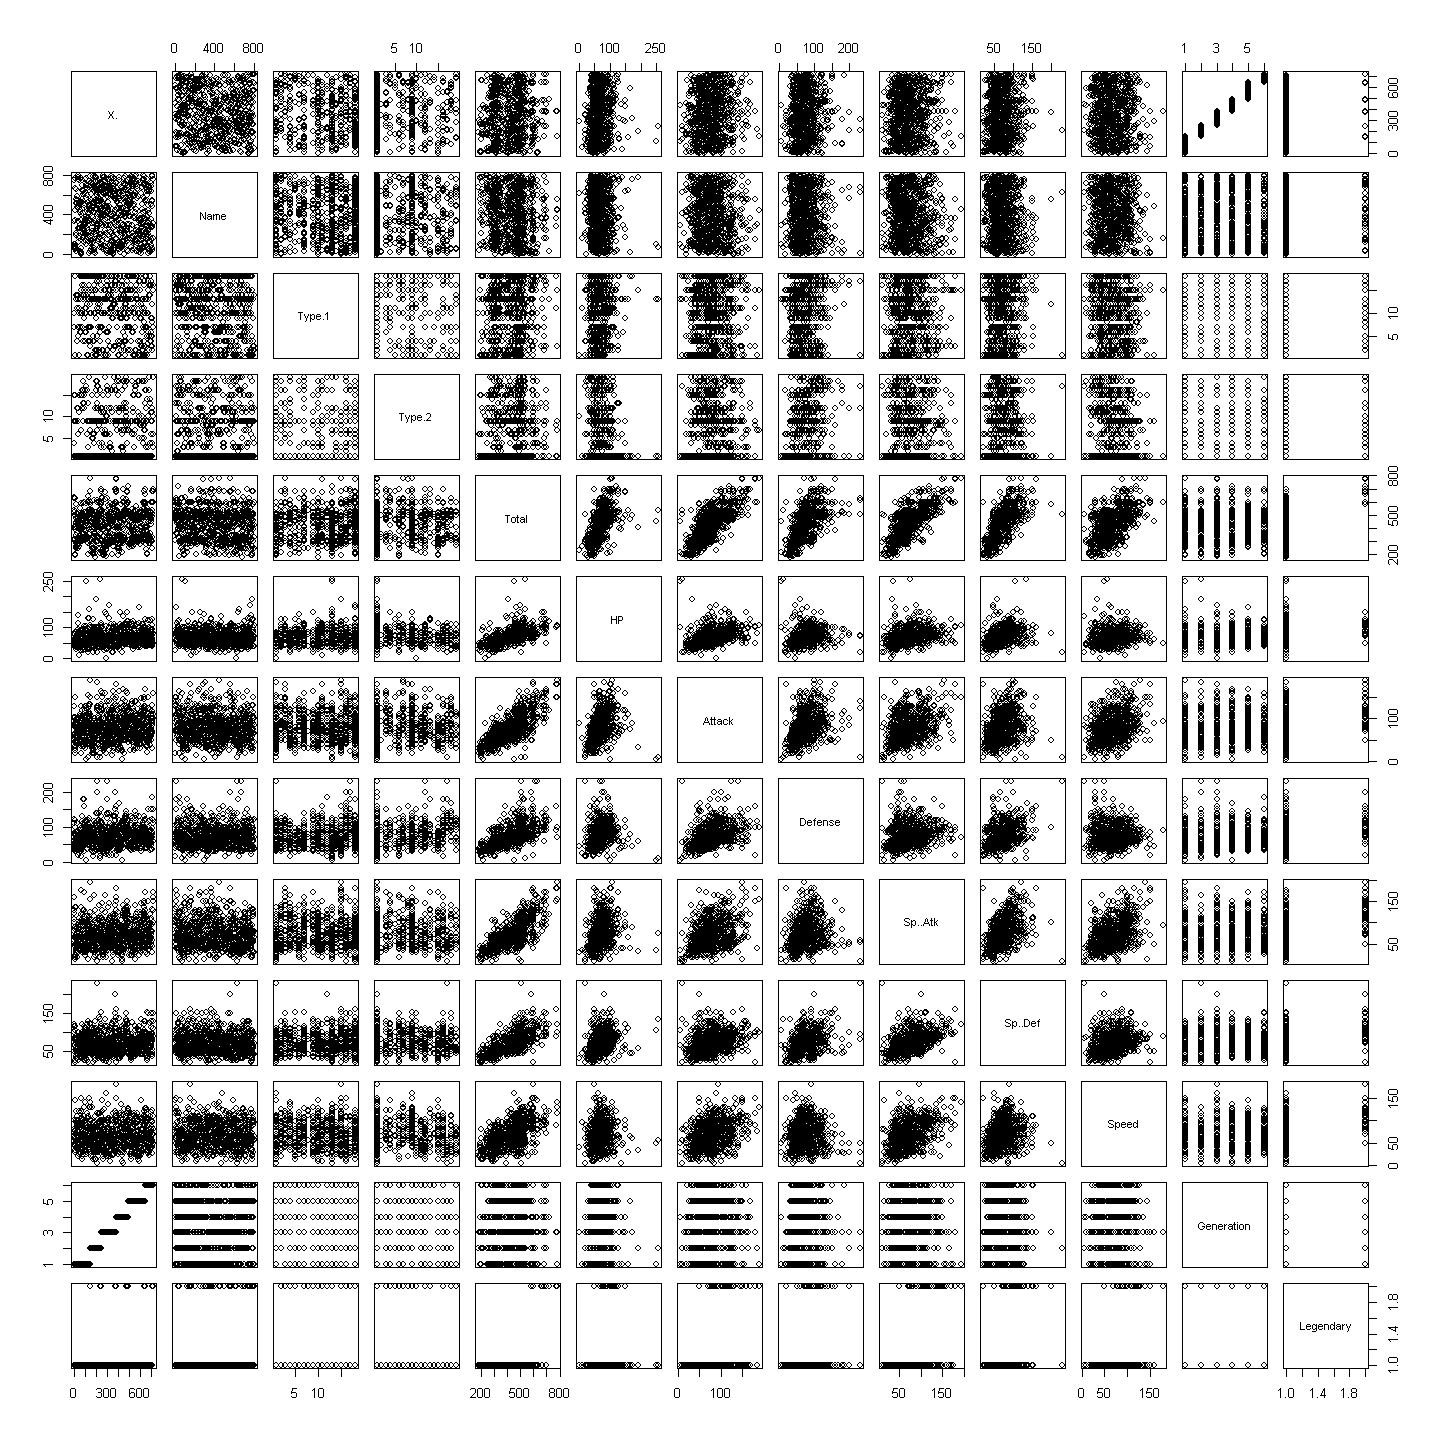

In [8]:
options(repr.plot.width=12, repr.plot.height=12)

plot(df)

,HP,Speed,Attack,Defense
HP,1.0000000,0.1759521,0.4223860,0.2396223
Speed,0.1759521,1.0000000,0.3812397,0.0152266
Attack,0.4223860,0.3812397,1.0000000,0.4386871
Defense,0.2396223,0.0152266,0.4386871,1.0000000


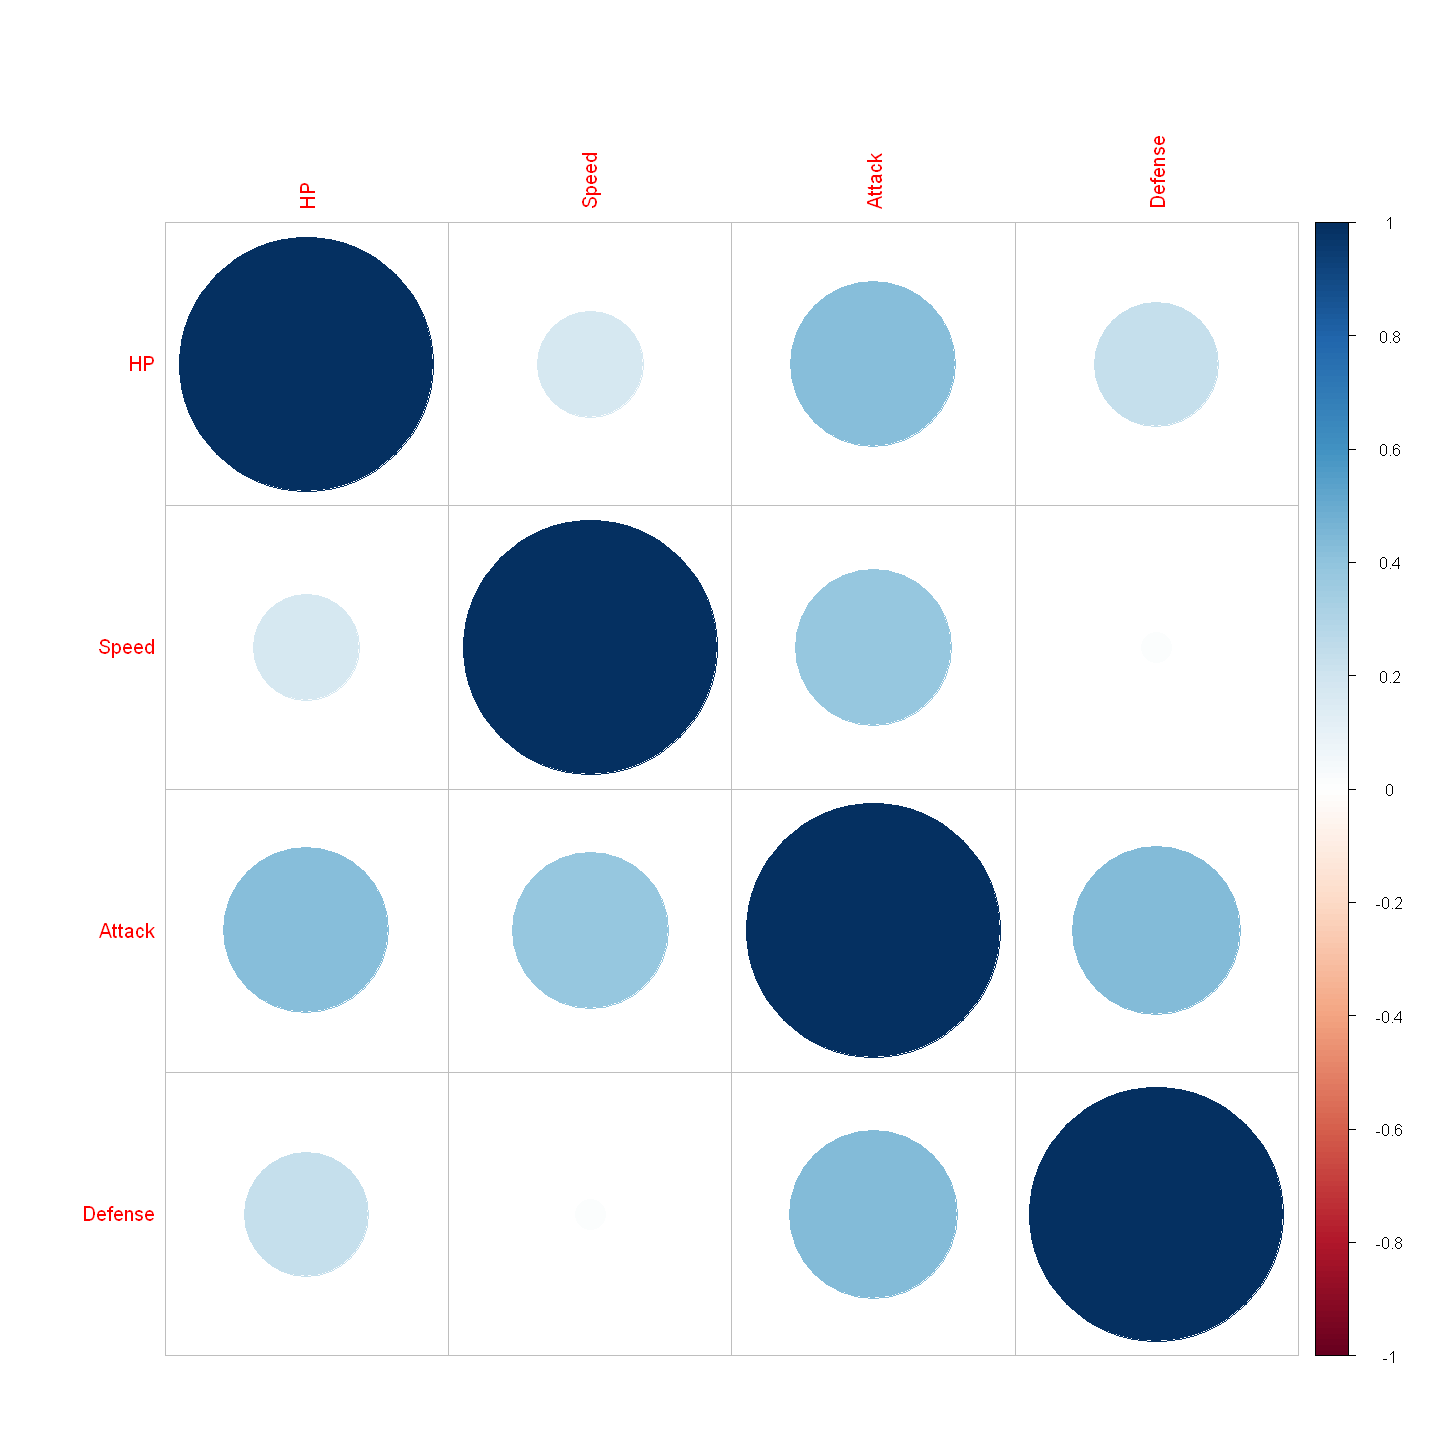

In [26]:
df1 <- subset(df, select=c(HP, Speed, Attack, Defense))
M = cor(df1)
M
corrplot(M)

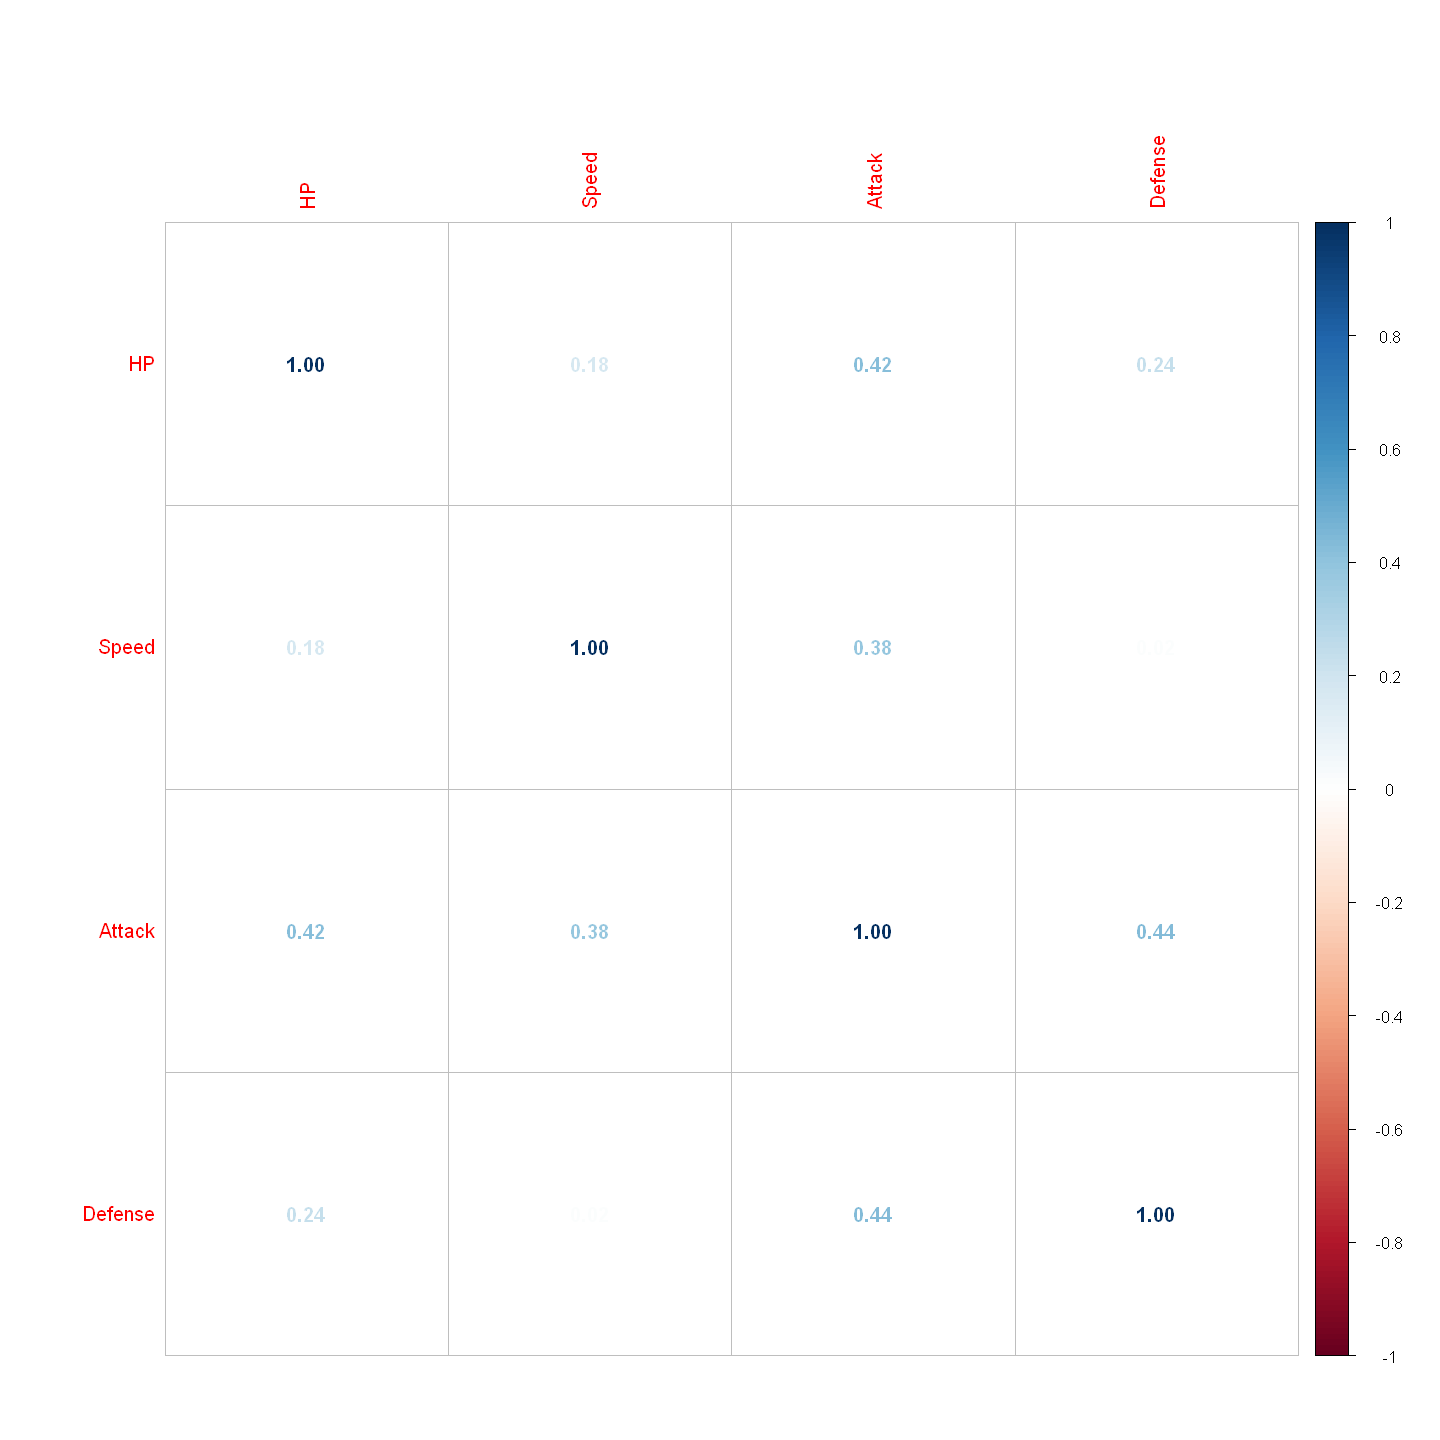

In [27]:
corrplot(M, method = 'number') # colorful number

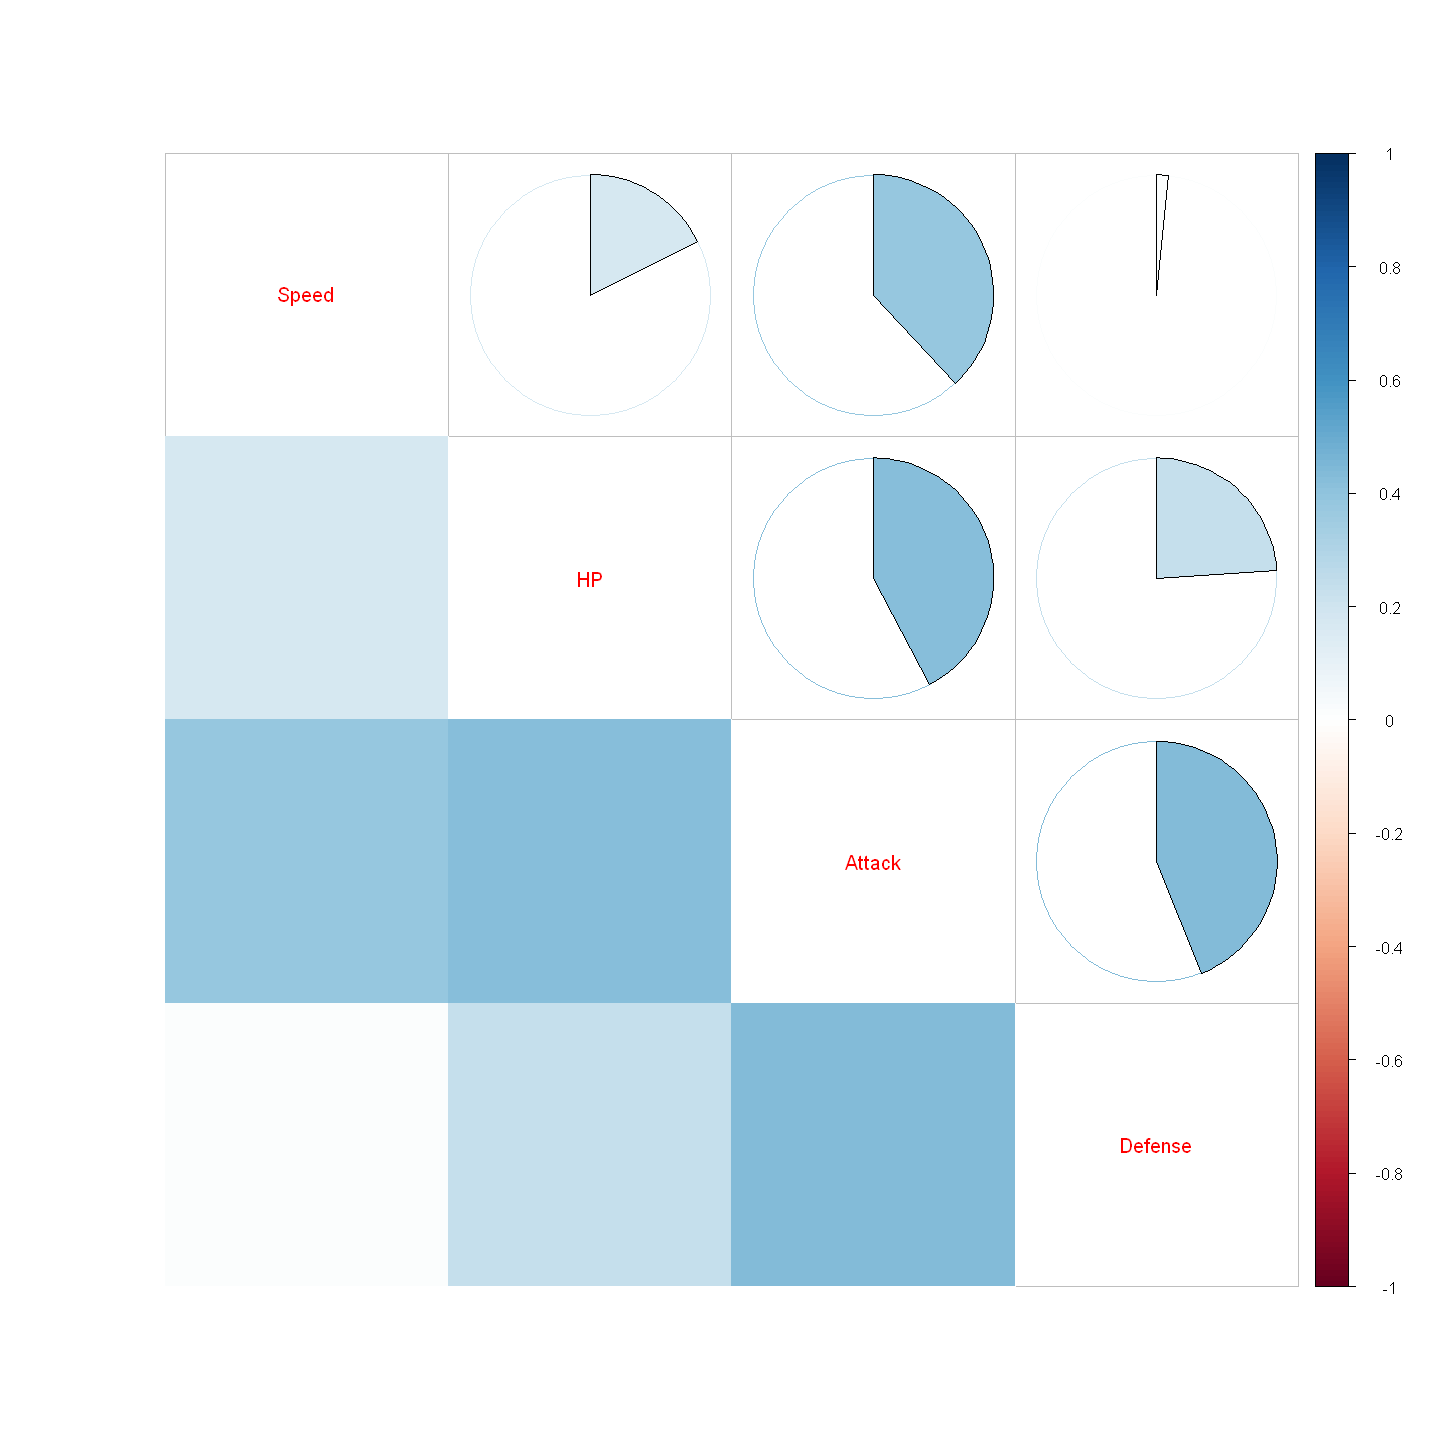

In [28]:
corrplot.mixed(M, lower = 'shade', upper = 'pie', order = 'hclust')

## 3. Investigate specific columns
Having run the correlation plots, pick 
- two numeric variables that are correlated
- two categorical variables that can be used for colour and shape.  One numeric value for size.
    - **Note:** In some cases you may need to categorize by putting numeric values into bands.  To determine a good band, use a histogram or some other univariate distribution plot.  Then use a case statement to allocate the values to your new column.  
    df %>%  
  mutate(new_column = case_when(  
    col1 < 9 ~ 'value1',  
    col1 < 12 ~ 'value2',  
    col1 < 15 ~ 'value3',  
    TRUE ~ 'Great'))  
### Plot:
- a Quantile-quantile plot for each continuous variable.
- A scatter plot , using the continuous variables on the x and y axes, with a pearson correlation coefficient, enhanced by the categorical variables, with appropriate legends, titles and values.
- Three marginal plots, one adding density plots, one adding histogram plots and one adding boxplots.


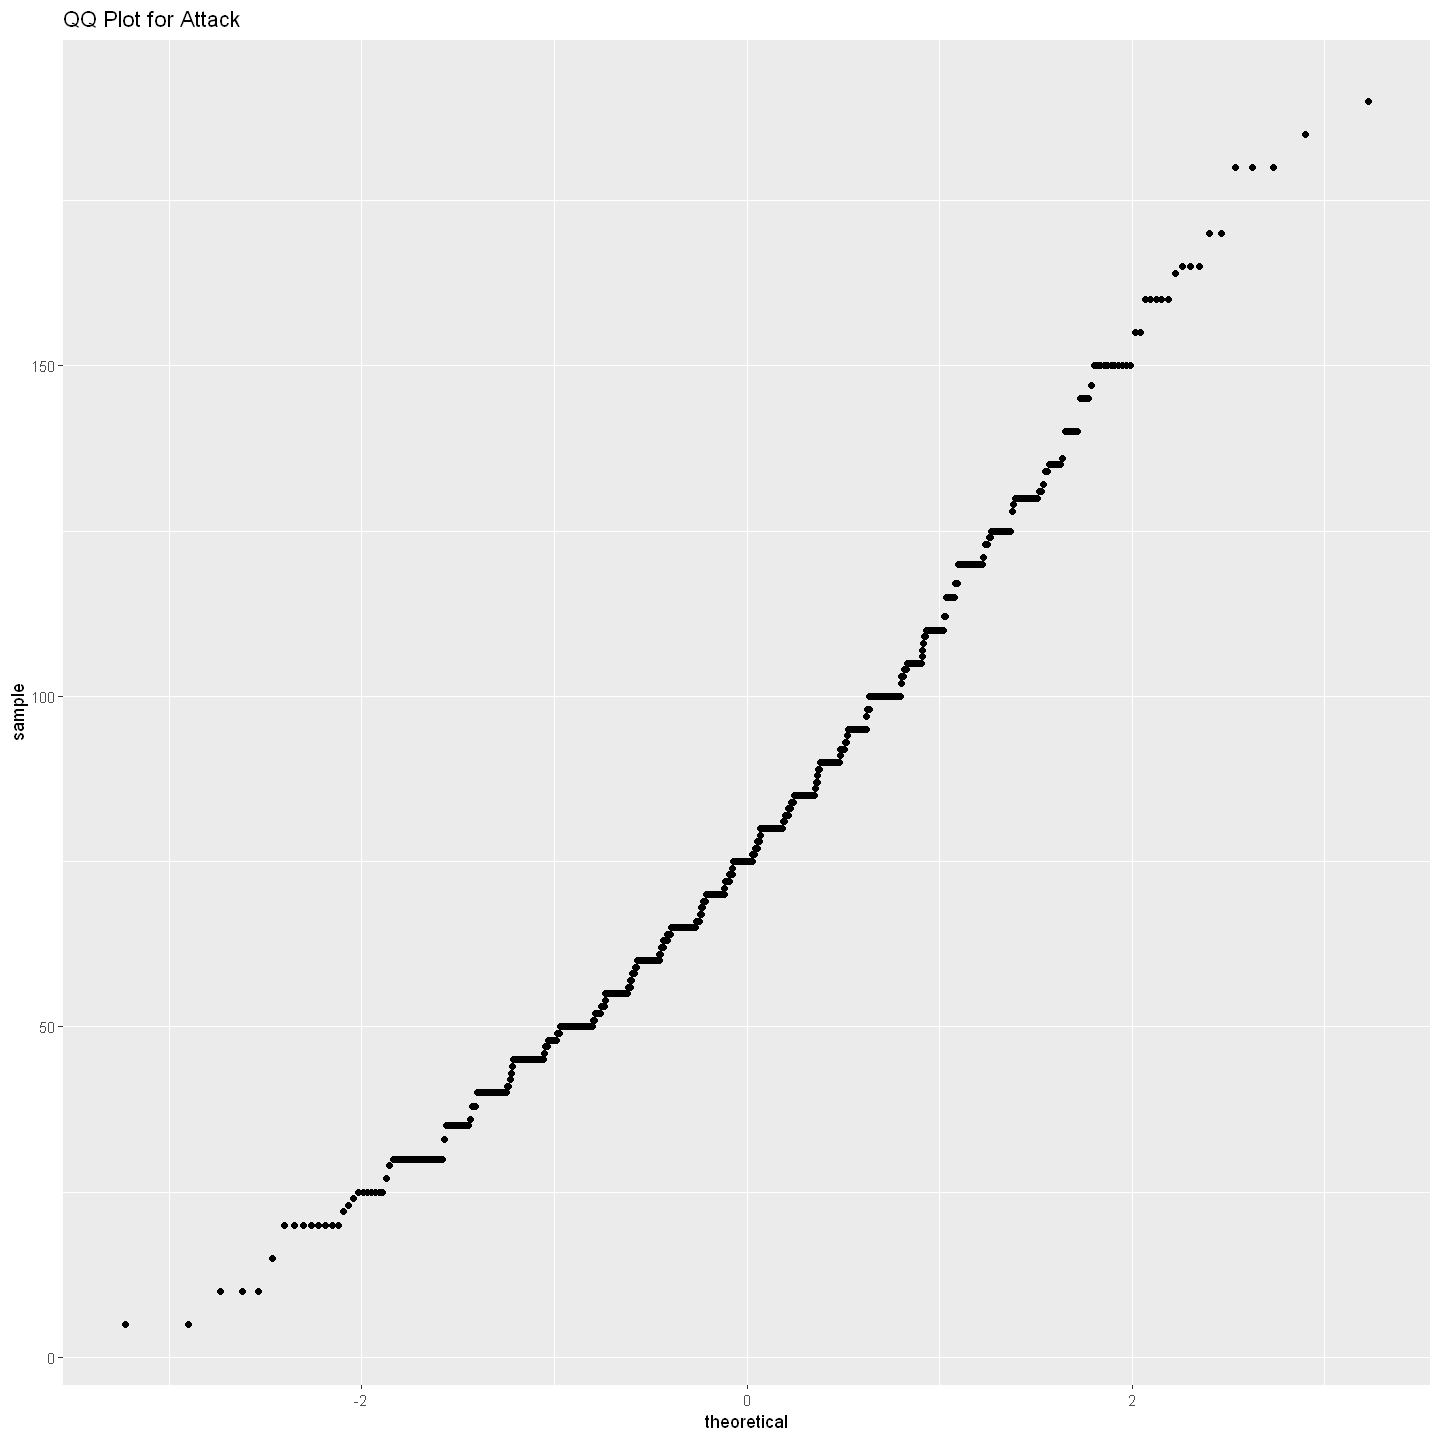

In [10]:
library(ggplot2)
library(dplyr)

# Assuming df is your dataframe containing the data

# Create bands for Total variable
df <- df %>%
  mutate(total_band = case_when(
    Total < 300 ~ 'Low',
    Total < 500 ~ 'Medium',
    Total < 700 ~ 'High',
    TRUE ~ 'Very High'
  ))

# Quantile-quantile plot for each continuous variable
ggplot(df, aes(sample = Attack)) + 
  stat_qq() + 
  ggtitle("QQ Plot for Attack")



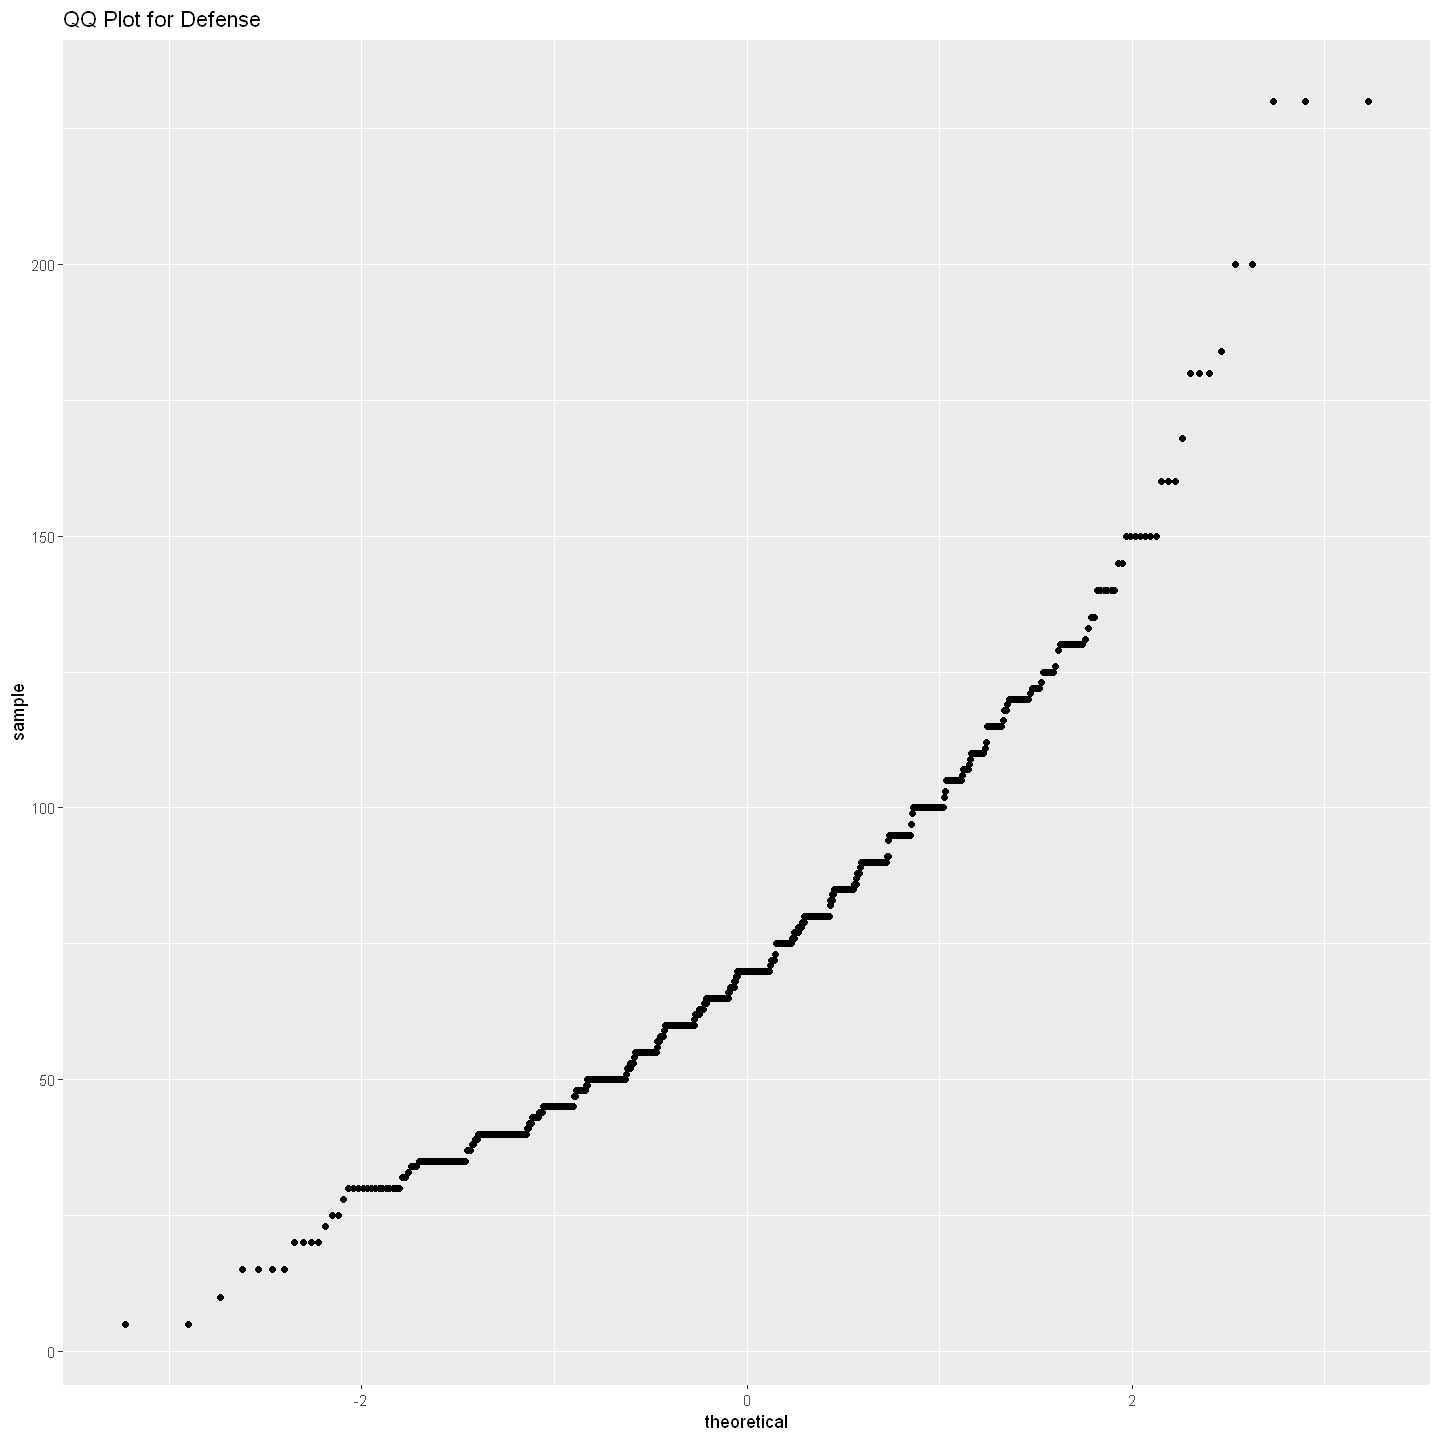

In [11]:
ggplot(df, aes(sample = Defense)) + 
  stat_qq() + 
  ggtitle("QQ Plot for Defense")



In [17]:
# Marginal plots
# Adding density plots
ggplot(df, aes(x = Attack, y = Defense)) +
  geom_point() +
  geom_density_2d() +
  geom_density(aes(y = Defense), color = "blue", alpha = 0.5, size = 1) +
  geom_density(aes(x = Attack), color = "red", alpha = 0.5, size = 1) +
  labs(title = "Scatter Plot with Density Plots")



Warning message:
"The following aesthetics were dropped during statistical transformation: y
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: y
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
ERROR while rich displaying an object: Error in `geom_density()`:
! Problem while setting up geom.
ℹ Error occurred in the 3rd layer.
Caused by error in `compute_geom_1()`:
! `geom_density()` requires the following missing aesthetics: y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]

Warning message:
"package 'ggpubr' was built under R version 4.3.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




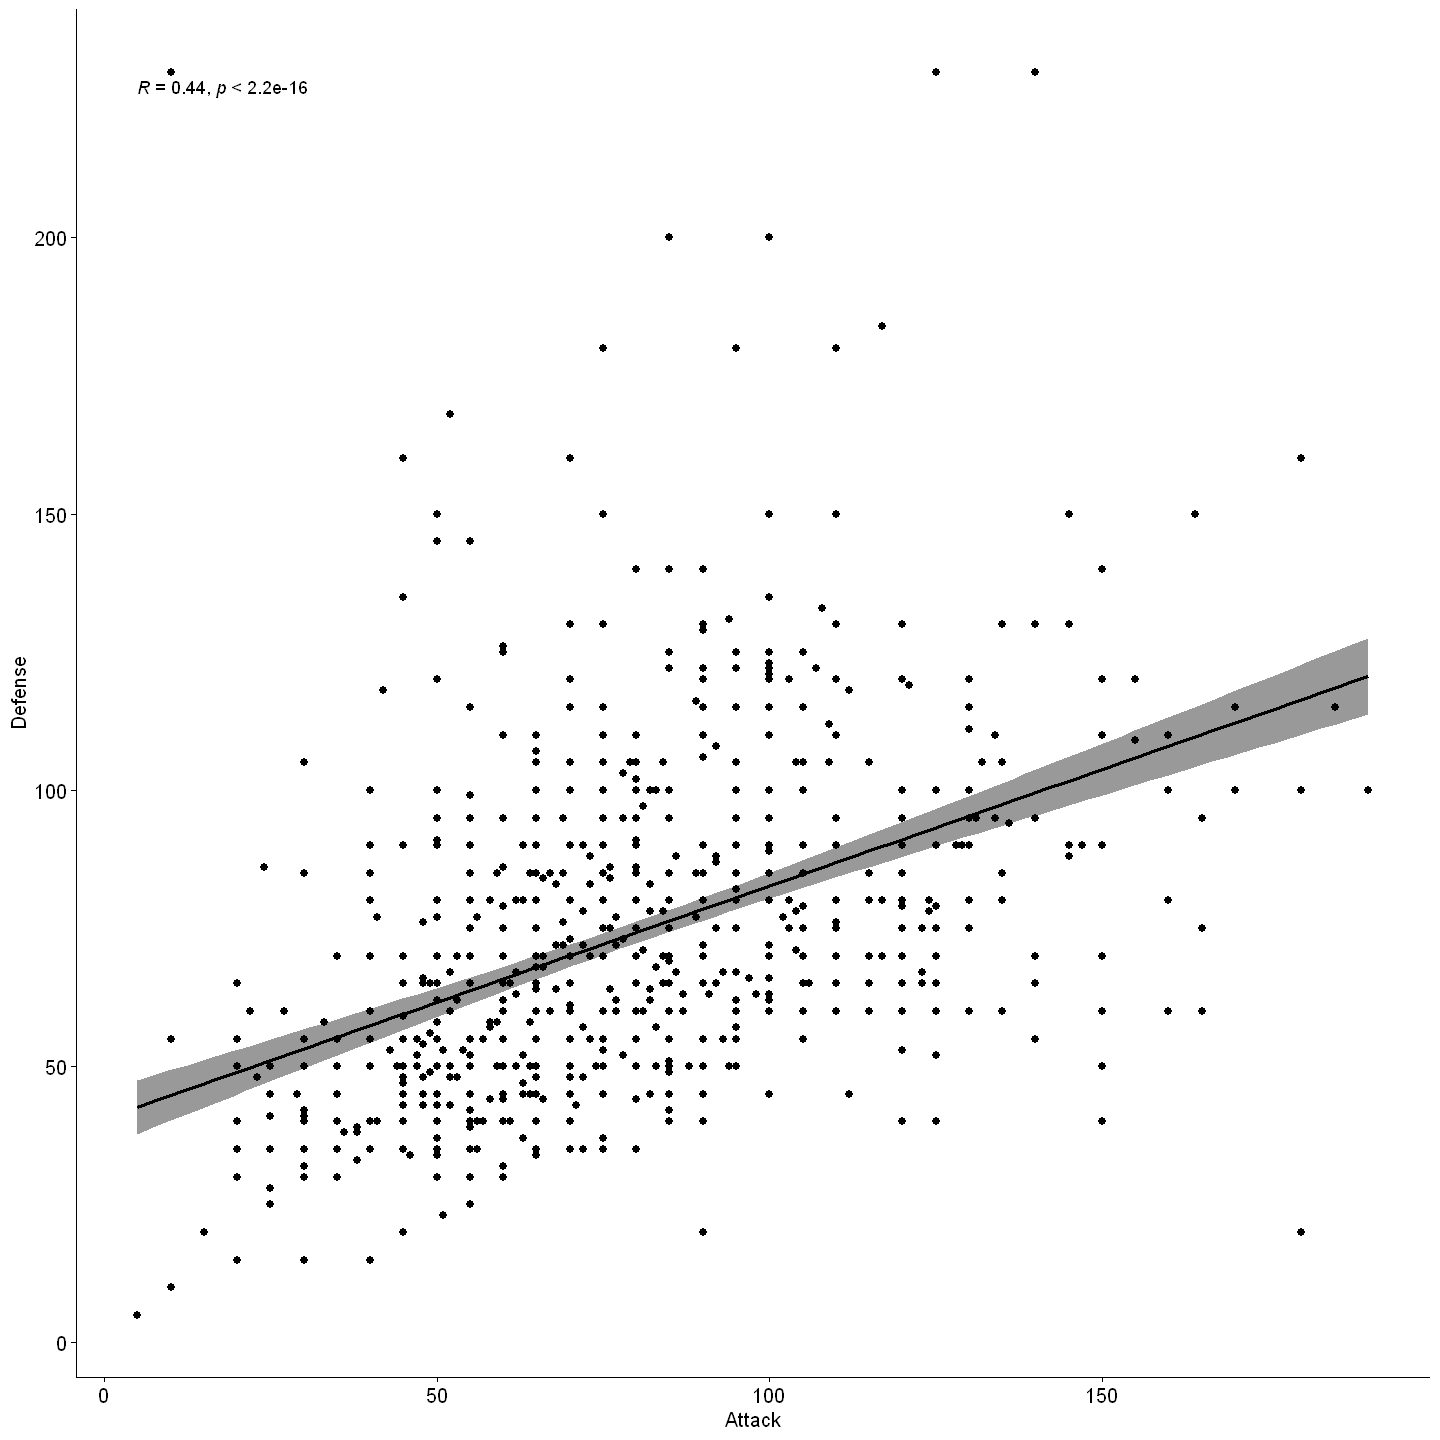

In [30]:
library(ggpubr)

ggscatter(df, x = "Attack", y = "Defense", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Attack", ylab = "Defense")


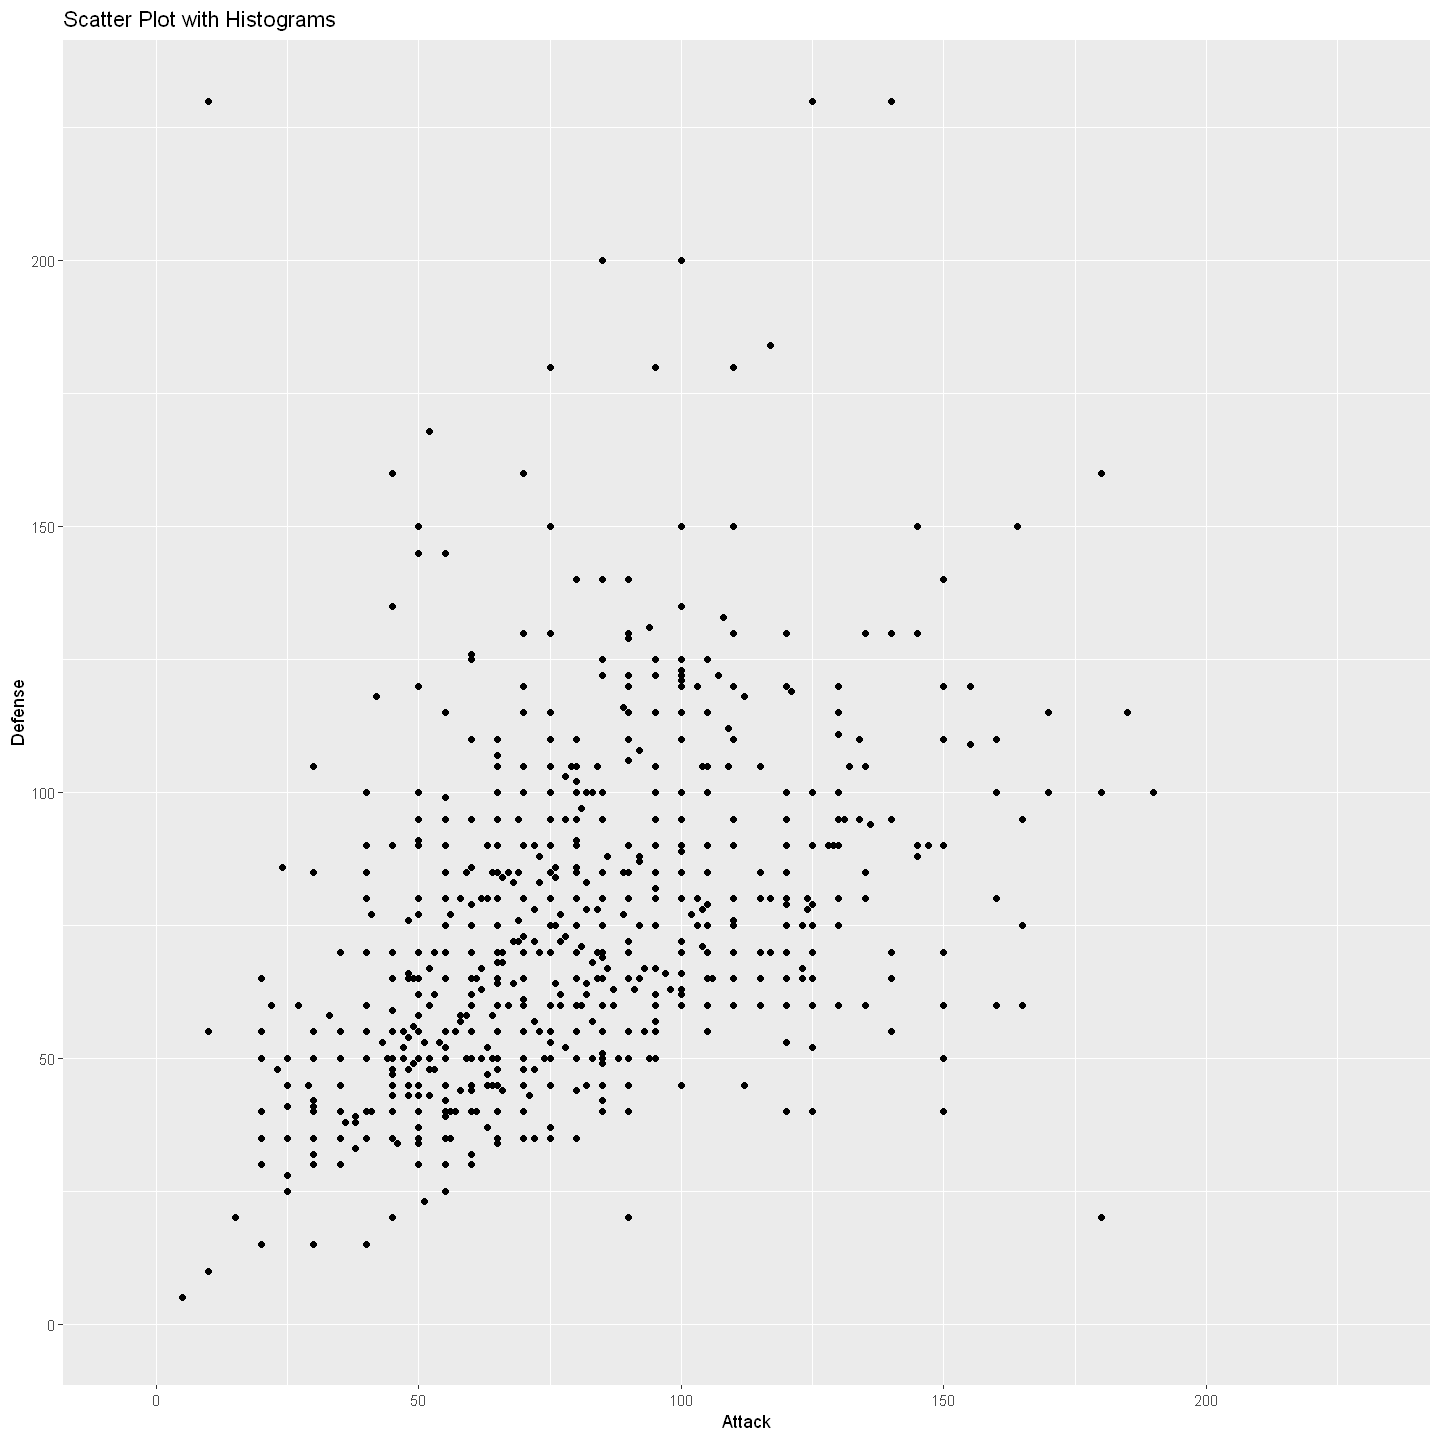

In [14]:
# Adding histogram plots
ggplot(df, aes(x = Attack, y = Defense)) +
  geom_point() +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "lightblue", alpha = 0.5) +
  geom_histogram(aes(x = Defense, y = ..density..), bins = 20, fill = "lightgreen", alpha = 0.5) +
  labs(title = "Scatter Plot with Histograms")



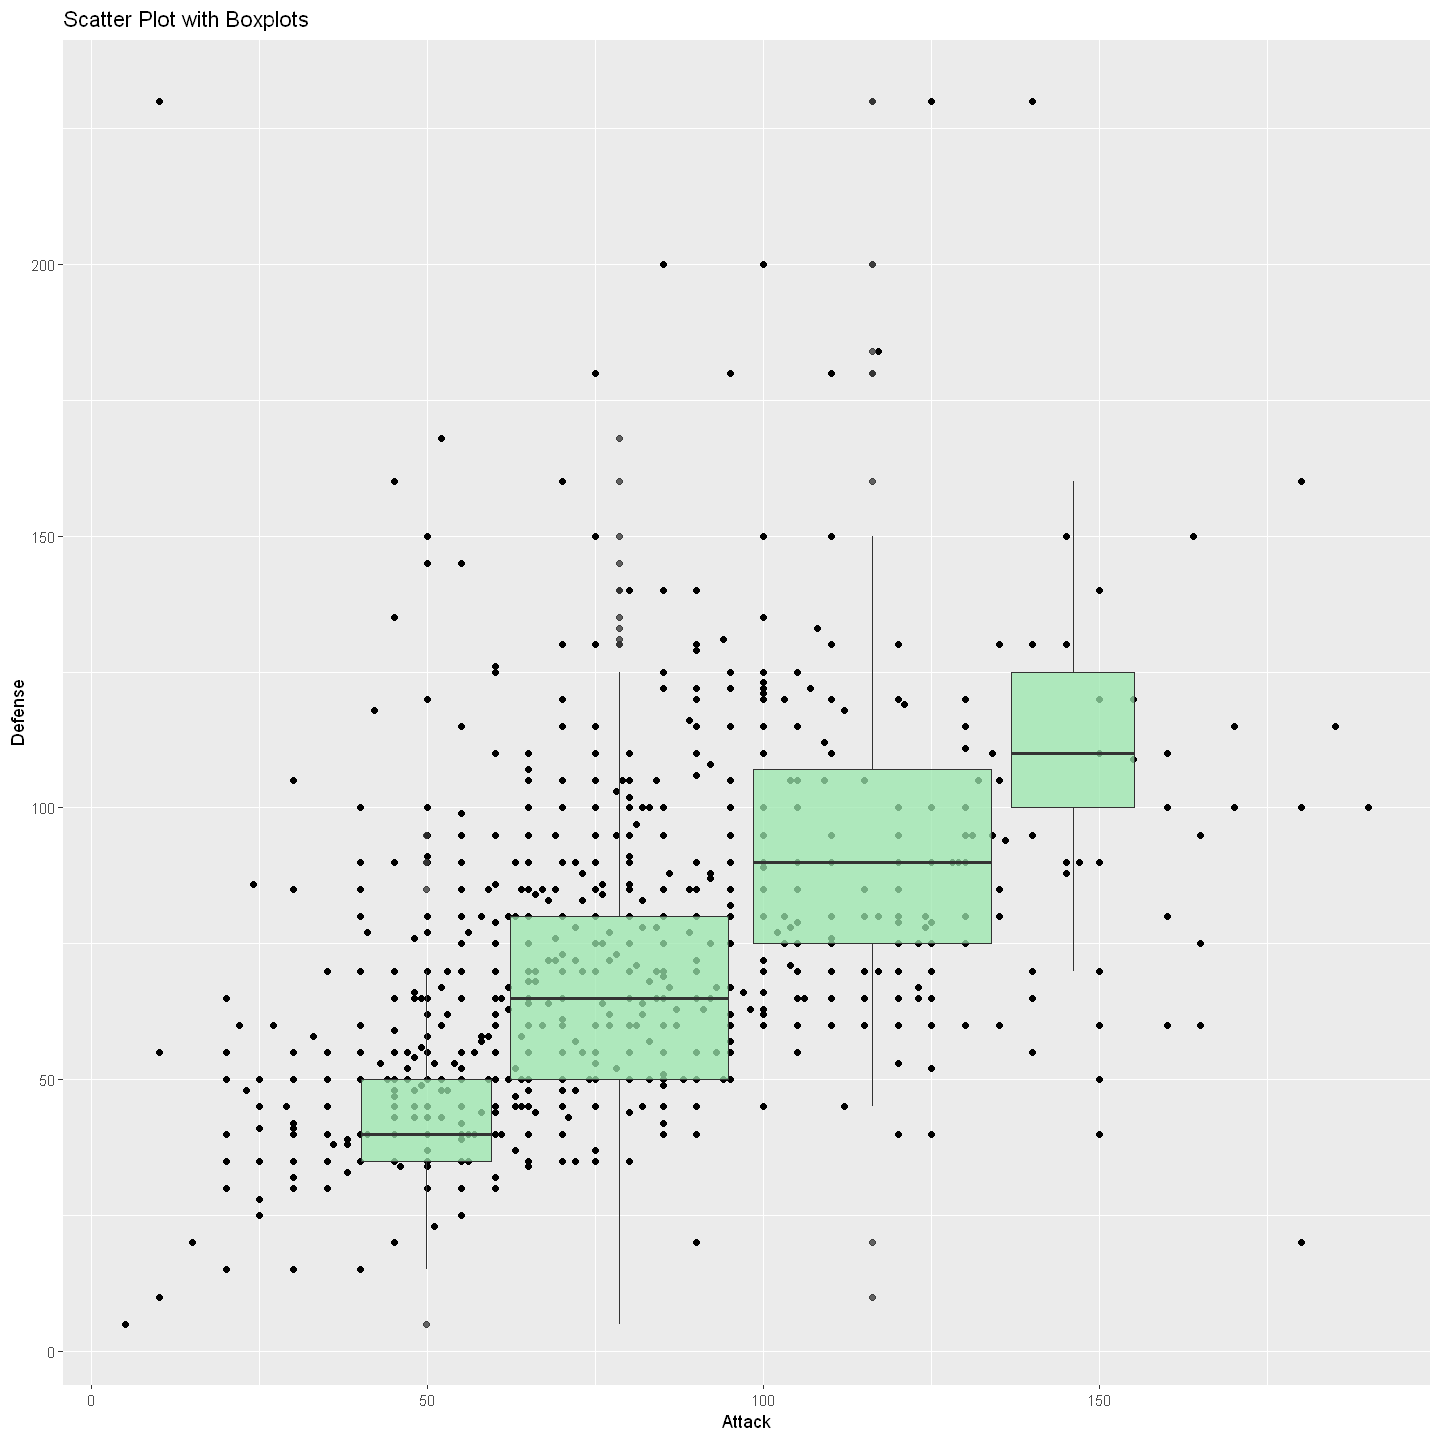

In [16]:
# Adding boxplots
ggplot(df, aes(x = Attack, y = Defense)) +
  geom_point() +
  geom_boxplot(aes(y = Defense, group = total_band), fill = "lightblue", alpha = 0.5) +
  geom_boxplot(aes(x = Attack, group = total_band), fill = "lightgreen", alpha = 0.5) +
  labs(title = "Scatter Plot with Boxplots")

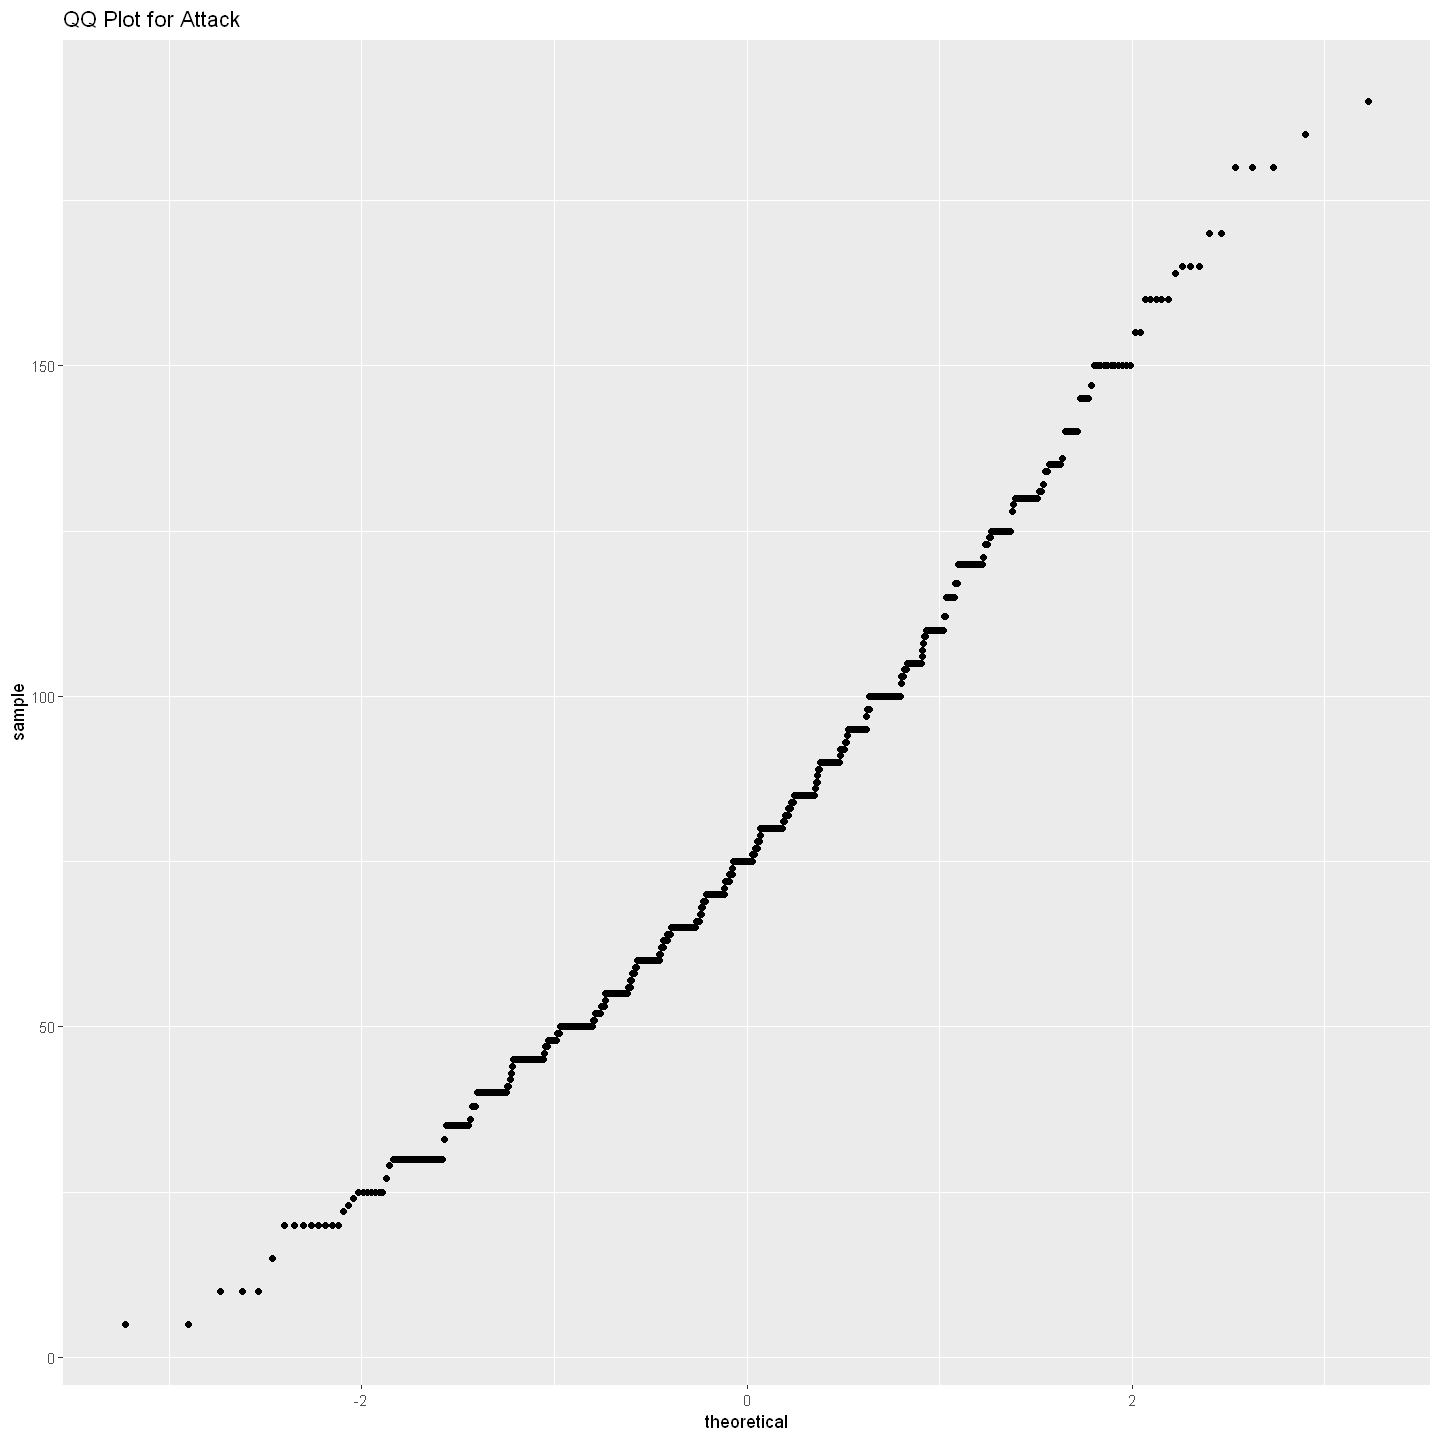

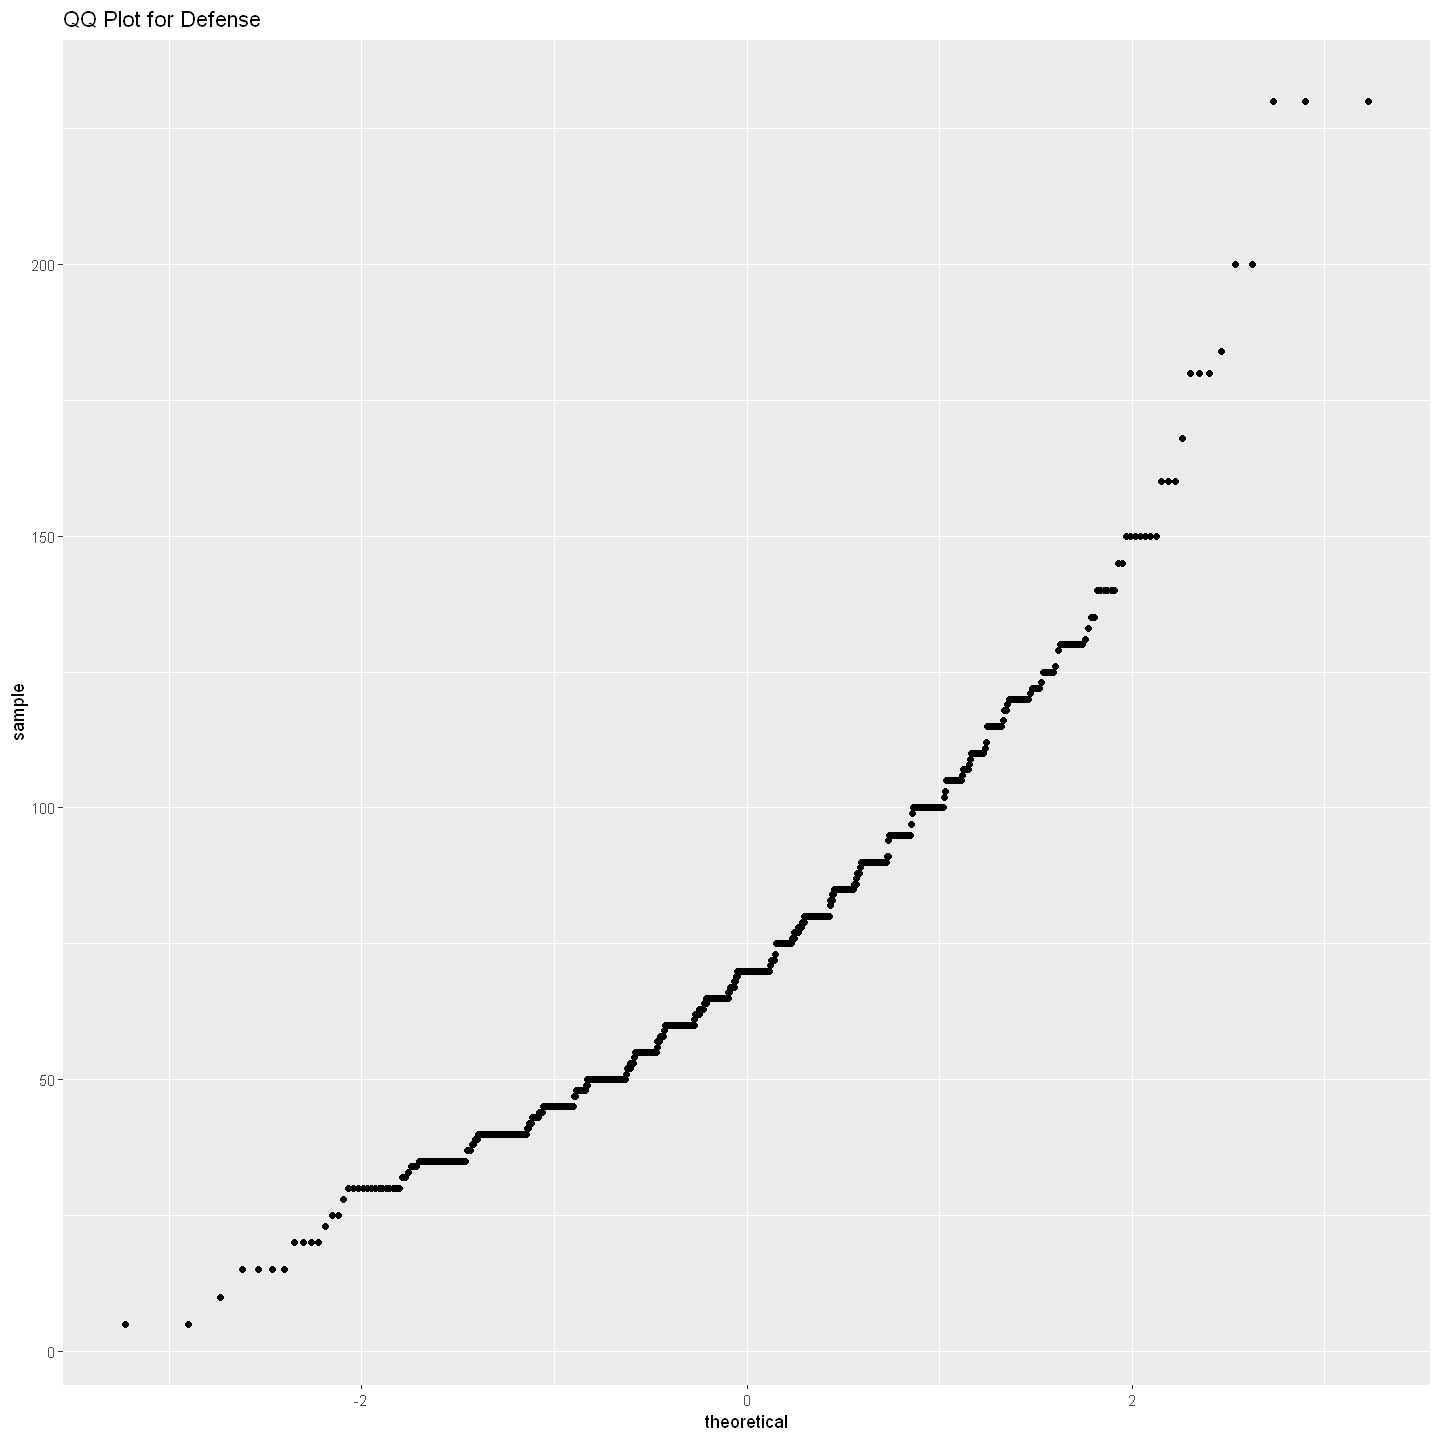

In [32]:
library(ggplot2)
library(dplyr)

# Assuming df is your dataframe containing the data

# Create bands for Total variable
df <- df %>%
  mutate(total_band = case_when(
    Total < 300 ~ 'Low',
    Total < 500 ~ 'Medium',
    Total < 700 ~ 'High',
    TRUE ~ 'Very High'
  ))

# Quantile-quantile plot for each continuous variable
ggplot(df, aes(sample = Attack)) + 
  stat_qq() + 
  ggtitle("QQ Plot for Attack")

ggplot(df, aes(sample = Defense)) + 
  stat_qq() + 
  ggtitle("QQ Plot for Defense")



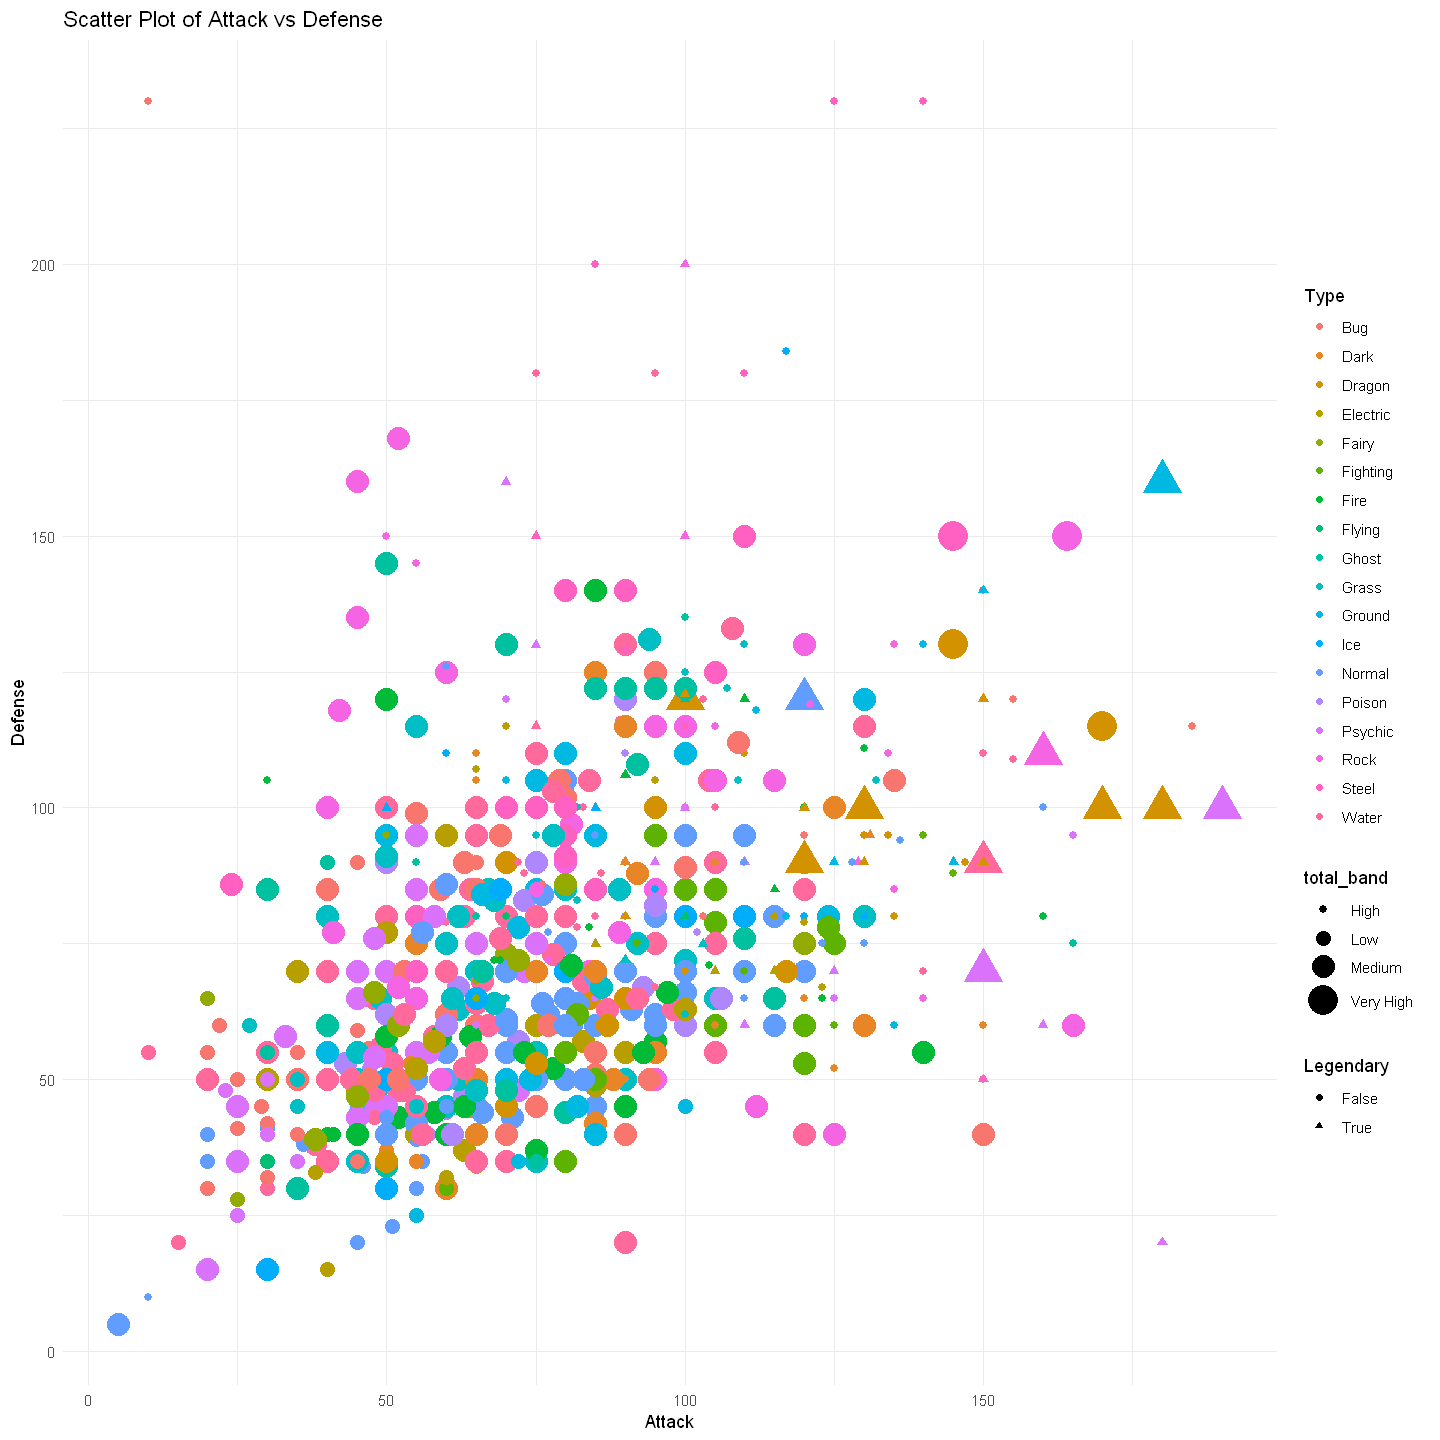

In [33]:
# Scatter plot with Pearson correlation coefficient
p <-ggplot(df, aes(x = Attack, y = Defense, color = Type.1, shape = Legendary, size = total_band)) +
  geom_point() +
  scale_size_manual(values = c(2, 4, 6, 8)) +  # Adjust size values as needed
  labs(title = "Scatter Plot of Attack vs Defense",
       x = "Attack",
       y = "Defense",
       color = "Type",
       shape = "Legendary") +
  theme_minimal()

p

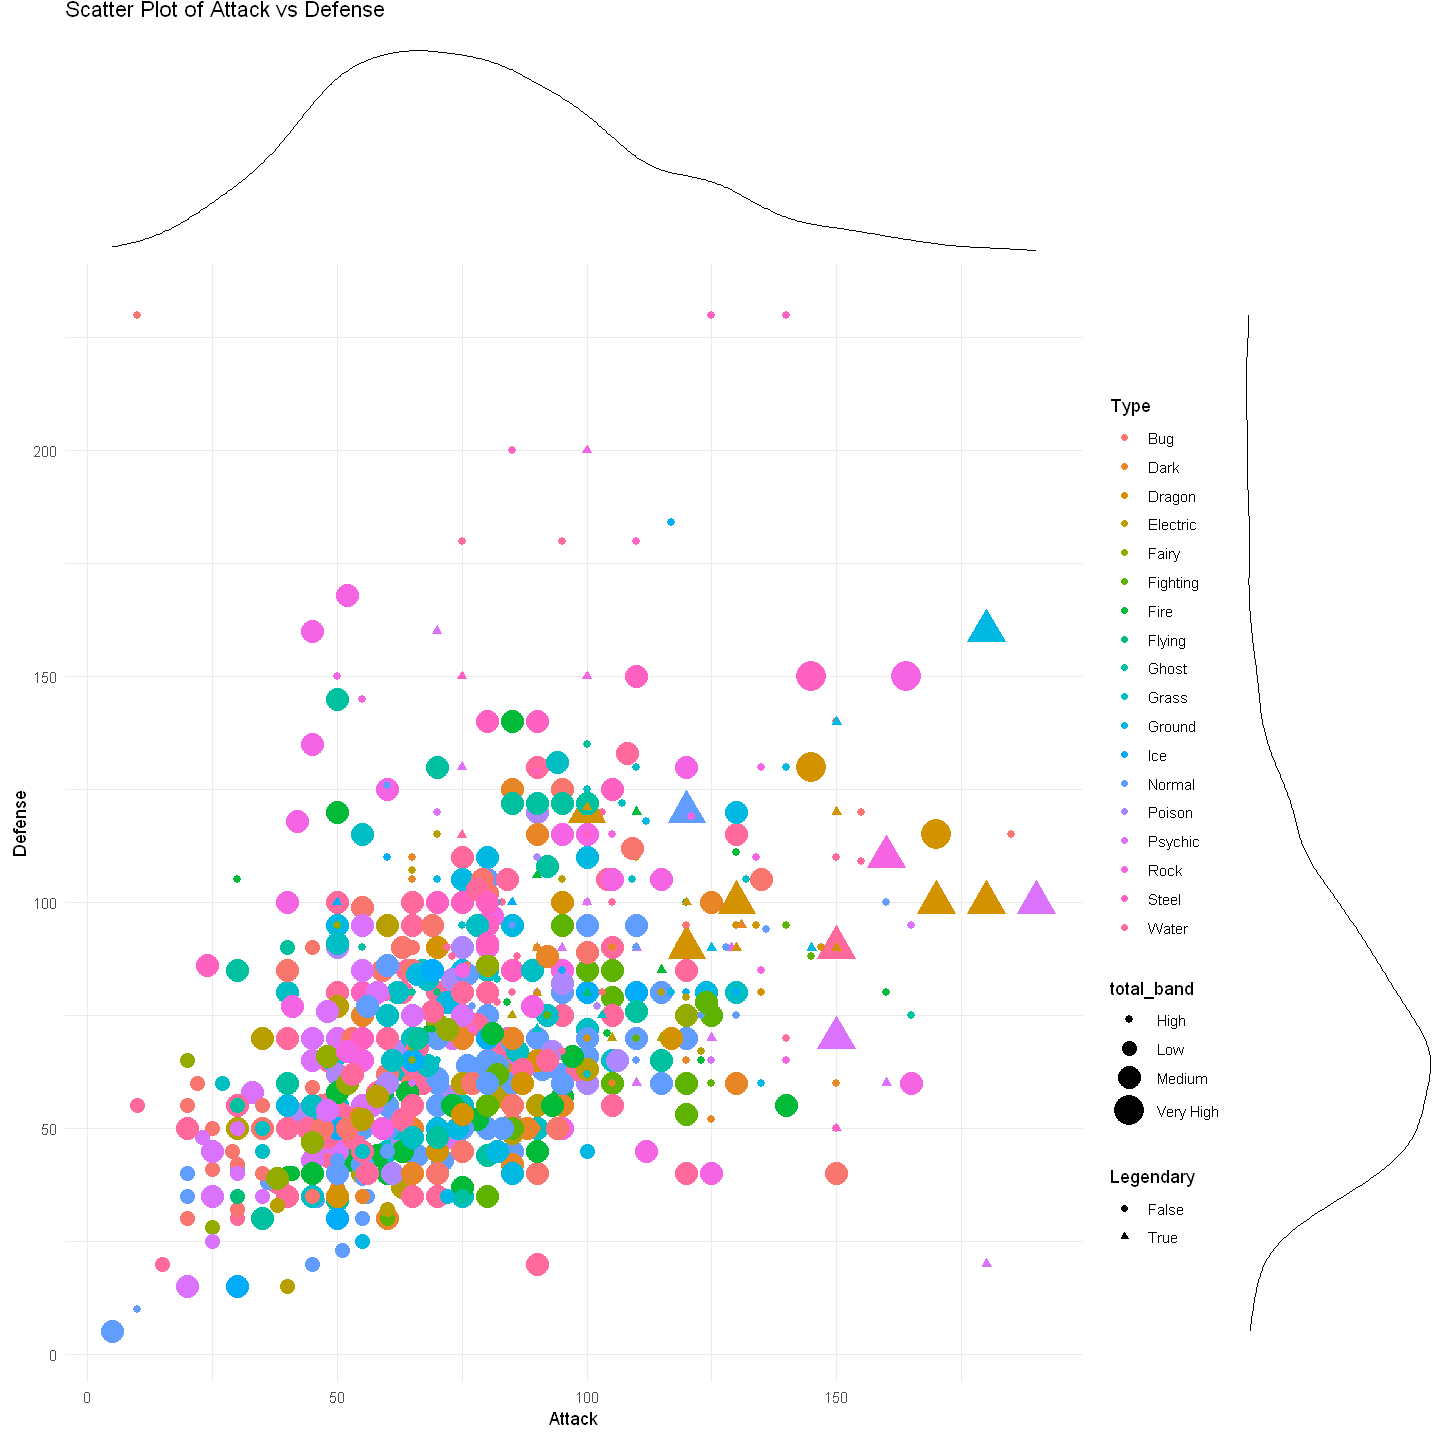

In [34]:
ggMarginal(p, type="density")

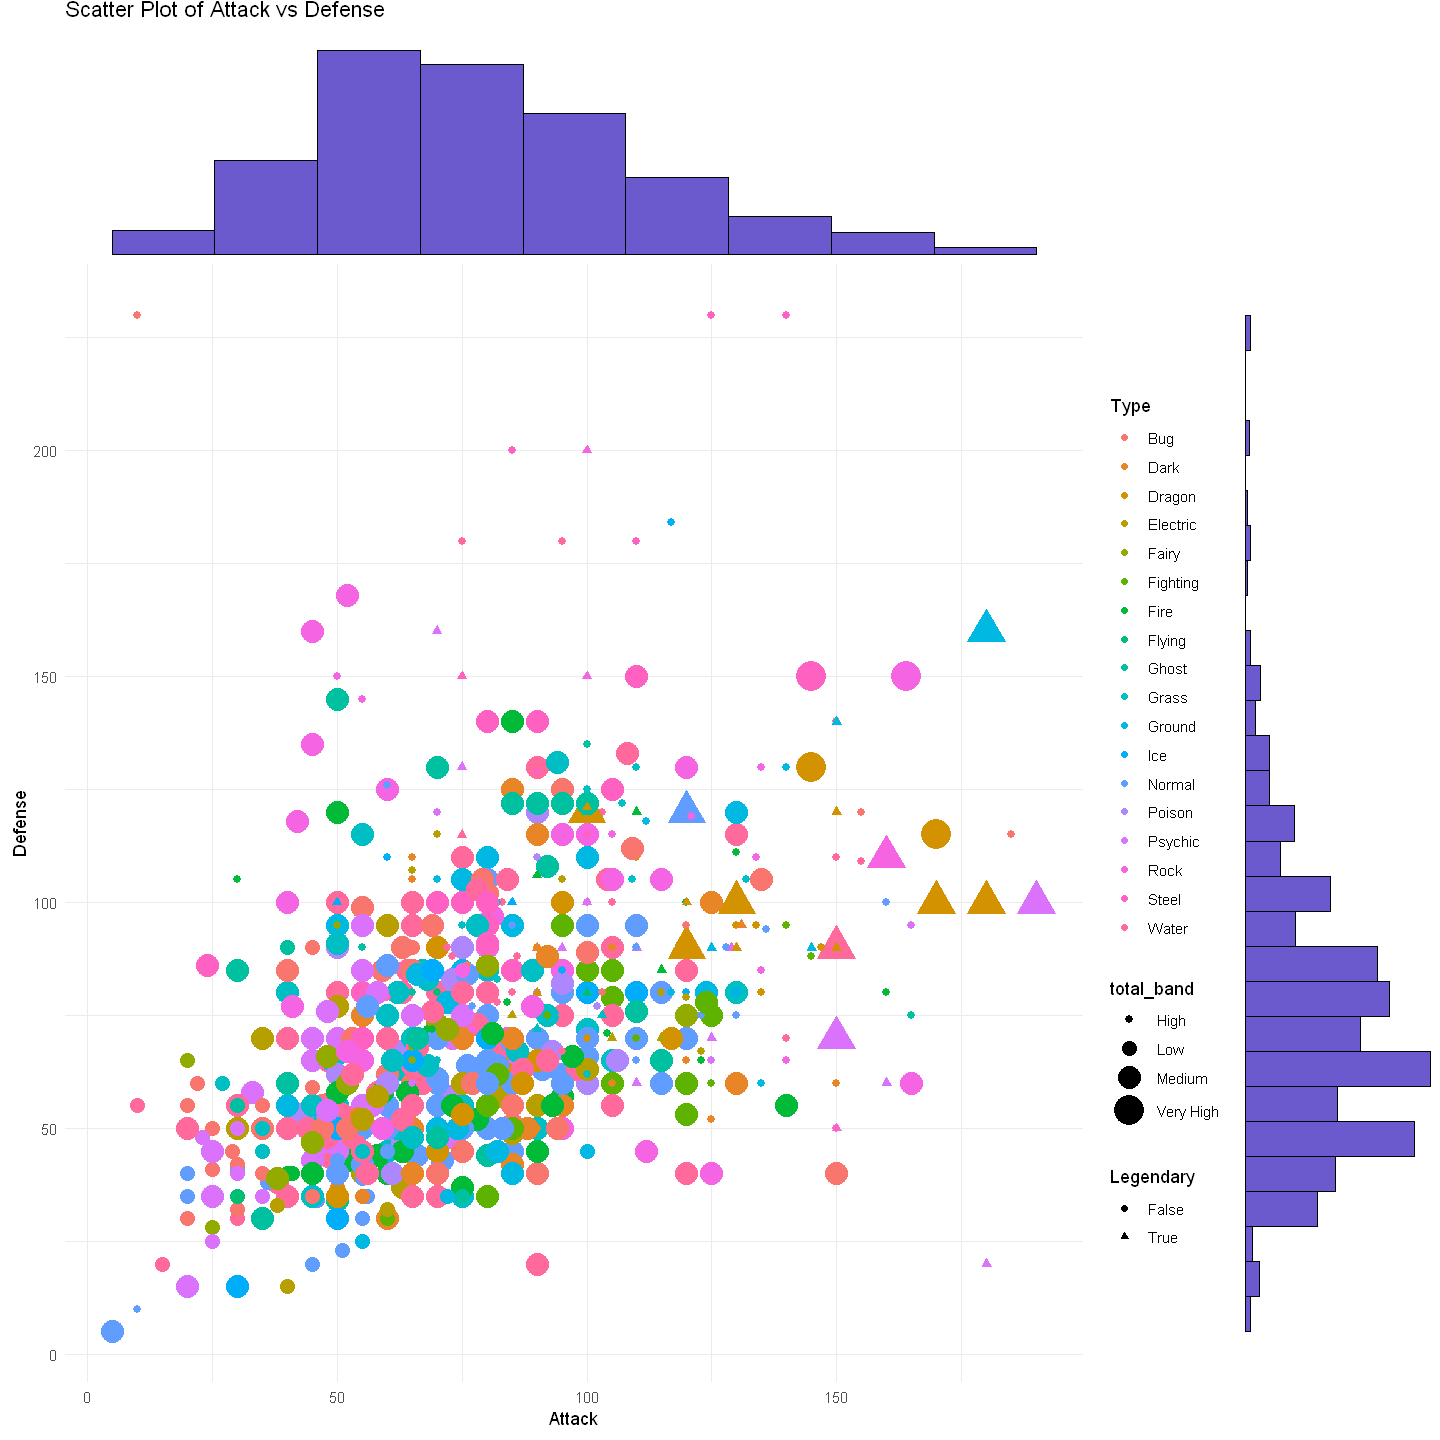

In [35]:
ggMarginal(p, type="histogram",fill = "slateblue", xparams = list(  bins=10))


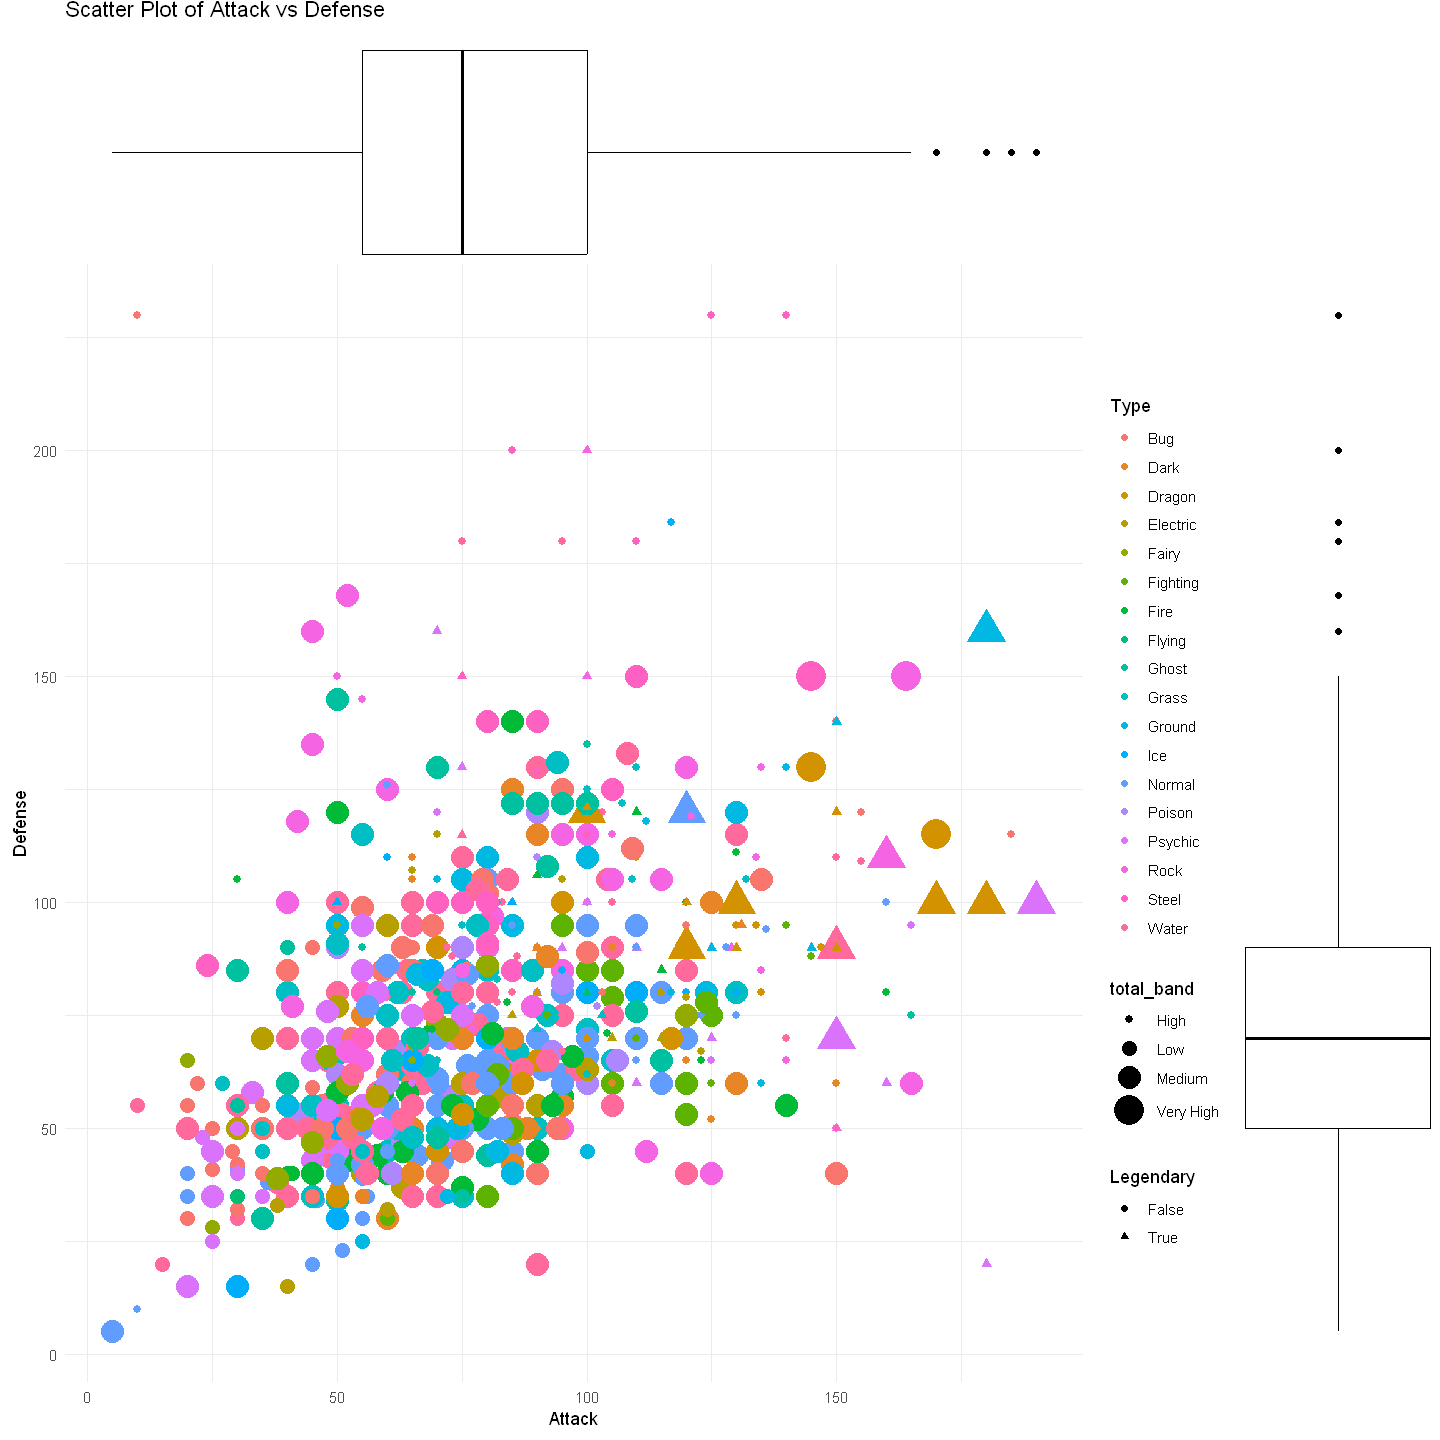

In [36]:
ggMarginal(p, type="boxplot")

## 4.  Develop a Big Idea:
- Who is your audience?
- What are the advantages of your audience knowing your message?
- What do they lose if they don't get the message?
- What is your message (Big Idea) in 1 sentence?


In [ ]:
#The audience is people curious on what type in pokemon has the best attack and defense and whether they are legendary or not
#They know whcih typing is the strongest and which to prepare for and that they might come across the most 
#They lack the knowledge of what typing they should be building into and what type to stay away from to be competitive 
#To make people aware of the best typing in these stats and if they are a legendary or not 